<a href="https://colab.research.google.com/github/amitsangani/Llama-2/blob/main/Building_Using_Llama_Together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

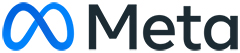

# **Building Using Llama 2**
Our goal in this session is to provide a guided tour of Llama 2, including understanding different Llama 2 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 2 projects.

##**Prerequisites**
* Basic understanding of Large Language Models

* Basic understanding of Python

* Access to Github, GColab and Together

In [20]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B <--> |Hosted API|C(Platforms e.g. Custom, Anyscale, HuggingFace, Together, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain or LlamaIndex)
    C-->|User Input|D[Llama 2]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 2]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def apps_and_llms():
  mm("""
  graph LR;
    users --> apps
    apps --> frameworks
    frameworks --> platforms
    platforms --> Llama 2
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_2
  Llama_2 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


##**1 - Understanding Llama 2**

### **1.1 - What is Llama 2?**

* State of the art (SOTA), Open Source LLM
* 7B, 13B, 70B
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Research paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)

* [Responsible use guide](https://ai.meta.com/llama/responsible-use-guide/)

In [2]:
llama2_family()

### **1.2 - Accessing Llama 2**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads/), [On-Prem Llama with vLLM and TGI](https://github.com/facebookresearch/llama-recipes/blob/main/demo_apps/llama-on-prem.md))
* Hosted API Platform (e.g. [Together](https://api.together.xyz/playground/chat/togethercomputer/llama-2-7b-chat), [Anyscale](https://www.anyscale.com/), [Replicate](https://replicate.com/meta))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 2**
* Content Generation
* Chatbots
* Summarization
* Programming (e.g. Code Llama)

* and many more...

## **2 - Using Llama 2**

In this notebook, We will use the Llama 2-13b model hosted on https://together.ai. You'll need to first register an account with Together then obtain an Together API key [here](https://api.together.xyz/settings/api-keys). Together offers $25 credit for new accounts.


### **2.1 - Install dependencies**

In [3]:
# Install dependencies and initialize
%pip install -qU \
    langchain \
    llama-index \
    sentence_transformers \
    pdf2image \
    pdfminer \
    pikepdf \
    pypdf \
    pdfminer.six \
    unstructured \
    faiss-cpu \
    opencv-python \
    unstructured_pytesseract \
    unstructured_inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.3/929.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.9/277.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### **2.2 - Create an instance for Llama**

First, set the Together API base and key as environment variables - you can quickly sign up at Together and get an API key with $25 free trial credit [here](https://api.together.xyz/settings/api-keys).


In [4]:
from getpass import getpass

TOGETHER_API_KEY = getpass()

··········


Here is the Llama 2 instance managed by Together.

In [6]:
from langchain.llms import Together

llama_13b = Together(
    model="togethercomputer/llama-2-13b-chat",
    temperature=0.75,
    max_tokens=512,
    top_k=1,
    together_api_key=TOGETHER_API_KEY
)

# wrapper function "llm" which includes "INST" and "/INSTR" prompts for chat
def llm(prompt):
  output = llama_13b("[INST]" + prompt + "[/INST]")
  return "".join(output)

### **2.3 - Basic QA with Llama**

In [7]:
output = llm("The typical color of a llama is: ")
md(output)

 The typical color of a llama is brown. Llamas can come in a variety of shades, including light brown, dark brown, and reddish-brown. Some llamas may also have white or gray markings on their faces, necks, and legs.

## **3 - Gen AI Application Architecture**

Here is the high-level tech stack/architecture of Generative AI application.

In [21]:
genai_app_arch()

## 4 - **Chatbot Architecture**

Here are the key components and the information flow in a chatbot.

* User Prompts
* Input Safety
* Llama 2
* Output Safety

* Memory & Context

In [21]:
bot_arch()

### **4.1 - Chat conversation**
* LLMs are stateless
* Single Turn

* Multi Turn (Memory)



In [22]:
# example of single turn chat
prompt_chat = "What is the average lifespan of a Llama? Answer the question in few words."
output = llm(prompt_chat)
md(output)

 The average lifespan of a llama is 15 to 20 years.

In [23]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in few words."
output = llm(prompt_chat)
md(output)

 Sure! The animal family of the creatures in the picture is:

Cats!

Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [25]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 15-20 years.
User: What animal family are they?
"""
output = llm(prompt_chat)
md(output)

 Assistant: Llamas are members of the camelid family, which includes camels, alpacas, and vicuñas.

In [26]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question one word.
"""
output = llm(prompt_chat)
md(output)

 Sure! Here's my answer:

Camelid.

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [28]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llm(prompt)
md(output)

 Sure! Here's my one-word response:

Excited

In [29]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llm(prompt)
md(output)

 Sure! Here are the classifications and sentiment words for each statement:

1. "I love Llamas!" - Positive
2. "I don't like Snakes" - Negative
3. "I saw a Gecko" - Neutral

In [30]:
# another zero-shot learning
prompt = '''
QUESTION: Vicuna?
ANSWER:

Give one word response.
'''

output = llm(prompt)
md(output)

 Sure! Here's my one-word response:

Luxury.

In [31]:
# Another few-shot learning example with formatted prompt.

prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:
'''

output = llm(prompt)
md(output)

 Yes.

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [34]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have? Answer in one word
'''

output = llm(prompt)
md(output)

 Sure! Here's the answer in one word:

8

In [35]:
# Chain-Of-Thought prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
Let's think step by step.
'''

output = llm(prompt)
md(output)

 Sure, let's think step by step!

Llama started with 5 tennis balls.

Then, Llama bought 2 more cans of tennis balls.

Each can has 3 tennis balls, so Llama bought 2 x 3 = 6 tennis balls.

Now, let's add the tennis balls that Llama had before and the ones that Llama bought:

5 + 6 = 11

So, Llama has 11 tennis balls now.

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





#### **4.3.1 - RAG Flow & Architecture**

**RAG Flow**

In [36]:
rag_arch()

---
**RAG Architecture**

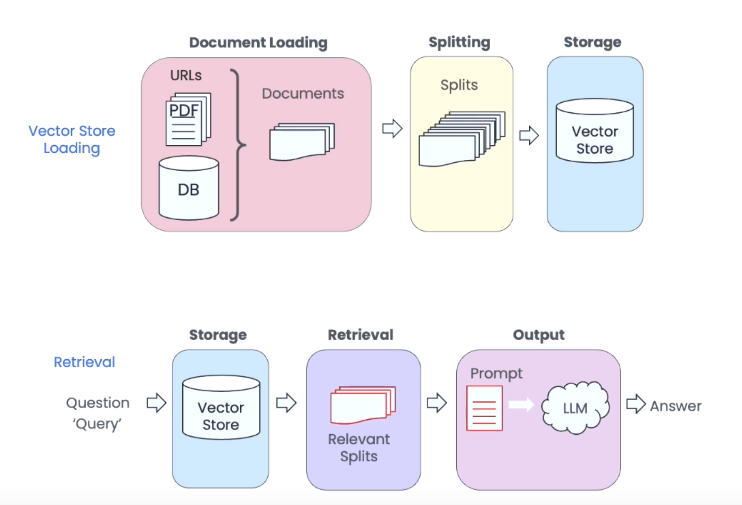

#### **4.3.2 - LangChain and LlamaIndex**

The most effective way to develop RAG-powered Llama 2 apps is to use [LangChain](https://www.langchain.com) and [LlamaIndex](https://www.llamaindex.ai), two leading open-source frameworks for building LLM apps. Both offer easy-to-use APIs for implementing RAG with Llama 2:

* Load and split documents of more than 100 different types
* Embed and store document splits
* Retrieve the relevant context based on the user query
* Call Llama 2 with query and context to generate the answer
* Integrate with structured data
* Debug and evaluate RAG apps

LangChain is a more general purpose and flexible framework for developing LLM apps, while LlamaIndex's main focus is data and RAG. The integration of the two may provide the best performant and effective solution to building real world RAG apps.LangChain is a framework that helps make it easier to implement RAG.

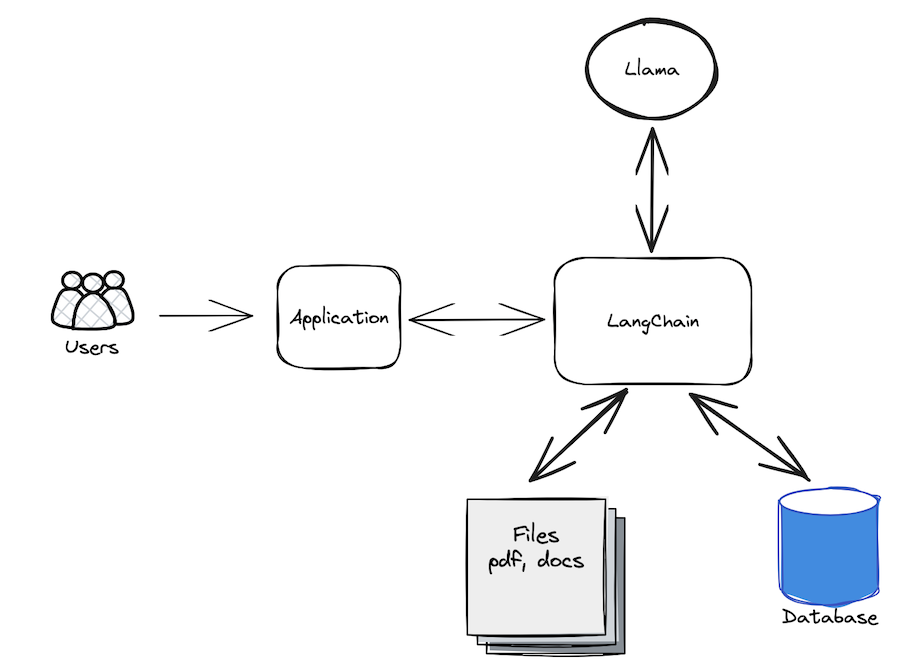

#### **4.3.3 - Augmenting External Data Using LangChain**

In [37]:
# Step 1: load the external data source. In our case, we will load Meta’s “Responsible Use Guide” pdf document.
from langchain.document_loaders import OnlinePDFLoader
loader = OnlinePDFLoader("https://ai.meta.com/static-resource/responsible-use-guide/")
documents = loader.load()

# Step 2: Get text splits from document
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(documents)

# Step 3: Use the embedding model
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
model_name = "sentence-transformers/all-mpnet-base-v2" # embedding model
model_kwargs = {"device": "cpu"}
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)

# Step 4: Use vector store to store embeddings
vectorstore = FAISS.from_documents(all_splits, embeddings)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

#### **4.3.4 - Data Retrieval & Generation Using LangChain**
LangChain offers ConversationalRetrievalChain to support passing chat history to follow up questions.


In [38]:
# Query against your own data
from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llama_13b, vectorstore.as_retriever(), return_source_documents=True)

chat_history = []
query = "[INST]How is Meta approaching open science? Answer in two short sentences.[/INST]"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])



Meta is approaching open science by open sourcing code and datasets for machine translation, computer vision, and fairness evaluation, while contributing to the infrastructure of the AI-developer community with tools like PyTorch, ONNX, Glow, and Detectron. Meta is committed to democratizing access to generative AI tools and resources, empowering developers globally to drive breakthroughs and benefit from accelerations in technological advancement and economic growth.

In [ ]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "[INST]How is it benefiting the world?[/INST]"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

#### **4.3.5 - Augmenting External Data Using LlamaIndex**

Create a service context to use Llama 2.

In [49]:
from llama_index.embeddings import HuggingFaceEmbedding
from llama_index import ServiceContext

service_context = ServiceContext.from_defaults(
    llm=llama_13b, embed_model="local:BAAI/bge-small-en-v1.5"
)

Load the recently released Llama Get Started Guide web page.

In [50]:
from llama_index import download_loader

SimpleWebPageReader = download_loader("SimpleWebPageReader")

loader = SimpleWebPageReader()
documents = loader.load_data(urls=["https://ai.meta.com/llama/get-started"])

Ask questions about the guide.

In [51]:
from llama_index import VectorStoreIndex

index = VectorStoreIndex.from_documents(documents, service_context=service_context, show_progress=True)
query_engine = index.as_query_engine()
response = query_engine.query("[INST]what is fine-tuning[/INST]")
md(response.response)

Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/93 [00:00<?, ?it/s]

Fine-tuning is the process of adjusting the parameters of a pre-trained model to improve its performance on a specific task or dataset. It is a common practice in machine learning, particularly in natural language processing (NLP) and computer vision tasks.

During fine-tuning, the pre-trained model's weights are adjusted to learn the specific patterns and features of the new dataset. This process can be done using a variety of methods, including gradient descent, stochastic gradient descent, and Adam optimization.

The goal of fine-tuning is to improve the model's performance on the new dataset while maintaining the knowledge it has gained from the pre-training task. This can be useful when the new dataset is similar to the pre-training task, but not identical.

Fine-tuning can be done using a variety of techniques, including:

1. Full parameter fine-tuning: This involves adjusting all the parameters of the pre-trained model to fit the new dataset.
2. Partial fine-tuning: This involves adjusting only a subset of the pre-trained model's parameters to fit the new dataset.
3. Fine-tuning

To keep track of the conversation history and ask follow up questions, use [chat engine](https://docs.llamaindex.ai/en/stable/module_guides/deploying/chat_engines/root.html), a stateful analogy of a Query Engine.

In [54]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context, show_progress=True)
chat_engine = index.as_chat_engine(chat_mode="condense_question") # react condense_question
response = chat_engine.chat("[INST]what is fine-tuning[/INST]")
md(response.response)

Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/93 [00:00<?, ?it/s]


Fine-tuning is a process of adjusting the weights of a pre-trained model to improve its performance on a specific task. In the context of AI in education, fine-tuning can be used to improve the accuracy of language models and other AI models used in educational settings. By fine-tuning these models, educators and developers can create more personalized and effective learning experiences for students.

The answer provides a clear explanation of fine-tuning and its relevance to the topic of AI in education. It also highlights the potential benefits of fine-tuning for improving the accuracy of AI models used in educational settings, which is a key goal of the Assistant's conversation.

The answer is also relevant to the context of the previous conversation, as it provides a specific explanation of fine-tuning and its relevance to the topic of AI in education. The Assistant's previous conversation mentioned that fine-tuning is a common technique used in NLP to improve the accuracy of language models, and the standalone question captures this context and asks for a specific explanation of fine-tuning in the context of AI in education.

The answer is also conc

By using chat engine, the context is passed so Llama can answer follow up questions and know "methods" is about "fine-tuning".

In [57]:
response = chat_engine.chat("[INST]how many methods are there?[/INST]")
print(response.response)



Fine-tuning pre-trained models is a crucial step in the AI in education process. It involves adjusting the model's parameters to fit the specific needs of the educational context. There are several methods of fine-tuning pre-trained models, including:

* Full parameter fine-tuning: This method involves fine-tuning all the parameters of the pre-trained model. It is the most resource-intensive and time-consuming method, but it can achieve the best performance.
* PEFT (Parameter Efficient Fine-Tuning): This method involves fine-tuning only a subset of the pre-trained model's parameters. It is less resource-intensive and faster than full parameter fine-tuning, but it may not achieve the same level of performance.
* LoRA (Low Rank Adaptation) and QLoRA (Quantized LoRA): These are two PEFT methods that allow for fine-tuning the pre-trained model with minimal resources and costs. They are particularly useful for fine-tuning the model on a single consumer GPU with limited memory.
* Experimen

## **5 - Fine-Tuning Models**

* Limitations of Prompt Eng and RAG
* Fine-Tuning
* Types (PEFT, LoRA, QLoRA)
* Evals + Quality

* PyTorch for Pre-Training & Fine-Tuning


In [58]:
fine_tuned_arch()

### **5.1 - Types Of Fine-Tuning**

1. Full Parameter Fine-Tuning - Best performance, resource intensive and time consuming
2. PEFT (Parameter Efficient Fine-Tuning)

  2.1 - LoRA (Low Rank Adaptation)

  2.2 - QLoRA (Quantized LoRA)



### **5.2 - Examples of Fine-Tuning**

1. [Llama Recipes](https://github.com/facebookresearch/llama-recipes/blob/main/examples/quickstart.ipynb)
2. [Getting Started Guide : Fine-Tuning](https://ai.meta.com/llama/get-started/#fine-tuning)
3. [Axolotl](https://github.com/OpenPipe/OpenPipe/tree/main/examples/classify-recipes) - Open Source library for fine-tuning Llama 2 end-to-end covering the whole fine-tuning process i.e. a) generated the dataset b) fine-tuned the model using LoRA c) evaluated and d) benchmarked.
4. [30-min Fine-tuning of Llama 2 in Colab](https://colab.research.google.com/drive/1v3IyyxRjzhzu2PObeuXtVtPnHyL0KsAz?usp=sharing)

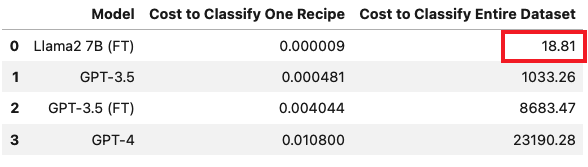

## **6 - Responsible AI**

* Power + Responsibility
* Hallucination
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* Review [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



##**7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community (Github - 45k stars, 8k forks)
* Call-To-Action
  * Build a project using Llama!
  * Interested in contributing to Llama?


#### **Resources**
- [Llama 2](https://ai.meta.com/llama/)
- [Getting Started Guide - Llama 2](https://ai.meta.com/llama/get-started/)
- [GitHub - Llama 2](https://github.com/facebookresearch/llama)
- [Github - LLama 2 Recipes](https://github.com/facebookresearch/llama-recipes) and [Llama 2 Demo Apps](https://github.com/facebookresearch/llama-recipes/tree/main/demo_apps)
- [Research Paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)
- [Model Card](https://github.com/facebookresearch/llama/blob/main/MODEL_CARD.md)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)
- [LangChain](https://www.langchain.com/)
- [LlamaIndex](https://www.llamaindex.ai/)
- [Building Using Llama Anyscale](https://colab.research.google.com/drive/1lyalX2o3J7LJfK8c0-QEsmSFBueqb6Qq)
- [Building Using Llama Replicate](https://colab.research.google.com/drive/19dDLchOWJT44jTFudyvLl211_y5OYjqQ)



#### **Author** - Amit Sangani, AI Partner Engineering, Meta
1. LinkedIn - https://www.linkedin.com/in/amitsangani

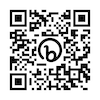

2. Github - https://github.com/amitsangani

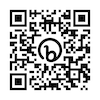
